In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [56]:
img = cv2.imread('cards_new.jpg')
im_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [53]:
# img_sobel_x = cv2.Sobel(im_bw, cv2.CV_64F, 0, 1, ksize=1)
# img_sobel_x = cv2.convertScaleAbs(im_bw)
# edge3 = cv2.Canny(img_sobel_x, 170, 200)
thresh, im_bw = cv2.threshold(im_bw, 100, 255, 0)


contours, hierarchy = cv2.findContours(im_bw.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(each) for each in contours]
rects2 = [(x,y,w,h) for (x,y,w,h) in rects if ((w>=95)&(w<=100)&(h>=113)&(h<=117))]
# rects2 = [(x,y,w,h) for (x,y,w,h) in rects if ((w>=50)&(w<=50)&(h>=50)&(h<=50))]
imgimg=img.copy()
for rect in rects2:
    # Draw the rectangles
    cv2.rectangle(imgimg, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5)
# plt.figure(figsize=(10,30))
# plt.imshow(imgimg)

True

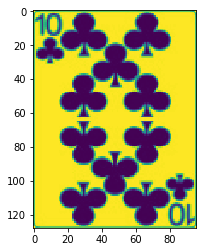

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import datetime
data_loc = '../dataset/'
decklist = os.listdir(data_loc)
cardlist=[]
for i in os.listdir(data_loc+'card_deck1'):
    cardlist.append(i[:-4])
imglist = []
for j in cardlist:
    for i in decklist:
        tmpimg = cv2.imread(data_loc+i+'/'+j+'.jpg', cv2.IMREAD_GRAYSCALE)
        tmpimg = cv2.resize(tmpimg, (96, 128), interpolation=cv2.INTER_AREA)
        imglist.append(tmpimg)
labellist=[]
for i in cardlist:
    for j in range(len(decklist)):
        labellist.append(i)
# plt.imshow(imglist[0])
# hog = cv2.HOGDescriptor((100, 100), (10, 10), (5, 5), (5, 5), 9)
hog = cv2.HOGDescriptor((32,48), (16,16), (8,8), (8,8), 9)
computed = []
for img in imglist:
    computed.append(hog.compute(img))
train_desc = np.array(computed).squeeze().astype(np.float32)
train_labels = np.repeat(np.arange(52), len(train_desc)/52)
# svm 파라미터는 진짜 모르겠따... C가 뭔지 감마가 뭔지...ㅠㅠ
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setC(0.5)
svm.setGamma(0.1)
svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)

33 H8
8 C9
8 C9
48 SA
8 C9
33 H8


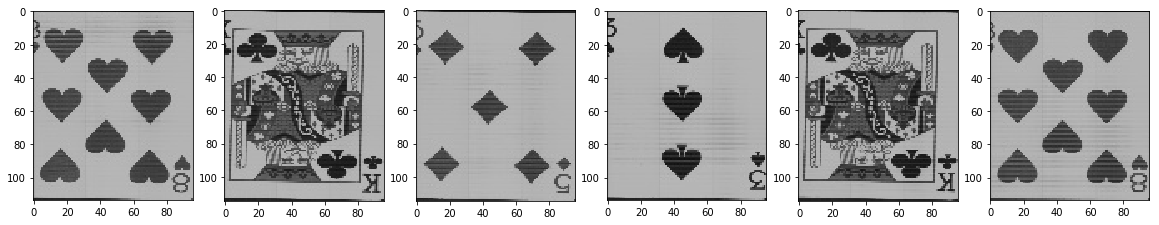

In [62]:
tmp = 1
plt.figure(figsize=(20,30))
for i in rects2:
#     print(i)
#     print(img, img.shape)
    plt.subplot(1,len(rects2), tmp)
    tmp+=1
    plt.imshow(img[i[1]:i[1]+i[3], i[0]:i[0]+i[2]])
    test_img = img[i[1]:i[1]+i[3], i[0]:i[0]+i[2]]
    img_resize = cv2.resize(test_img, (96, 128), interpolation=cv2.INTER_AREA)

    desc = hog.compute(img_resize)
    test_desc = np.array(desc).astype(np.float32)

    _, res = svm.predict(test_desc.T)
    print(int(res), cardlist[int(res)])